PHASE 2 

DATA EXPLORATION AND CLEANING 

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/meghna/Downloads/twitter_sentiment_data.csv", encoding="ISO-8859-1", header=None, names=["target", "ids", "date", "flag", "user", "text"])

# Display the first few rows of the dataset
print(data.head())

# Check the shape of the dataset
print("Shape of the dataset:", data.shape)

# Display information about the dataset
print(data.info())

# Summary statistics of the dataset
print(data.describe())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Unique values in the 'target' column (sentiment labels)
print("Unique values in 'target' column:", data['target'].unique())

# Unique values in the 'flag' column
print("Unique values in 'flag' column:", data['flag'].unique())

# Unique values in the 'user' column
print("Unique values in 'user' column:", data['user'].unique())

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Shape of the dataset: (1600000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count   

EXPLORATORY DATA ANALYSIS (EDA)

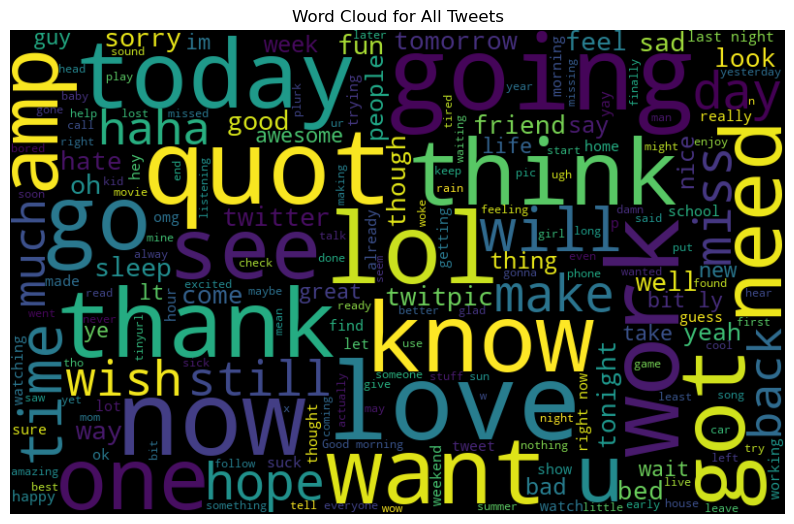

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Word cloud for all tweets
all_words = ' '.join([text for text in data['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for All Tweets')
plt.show()

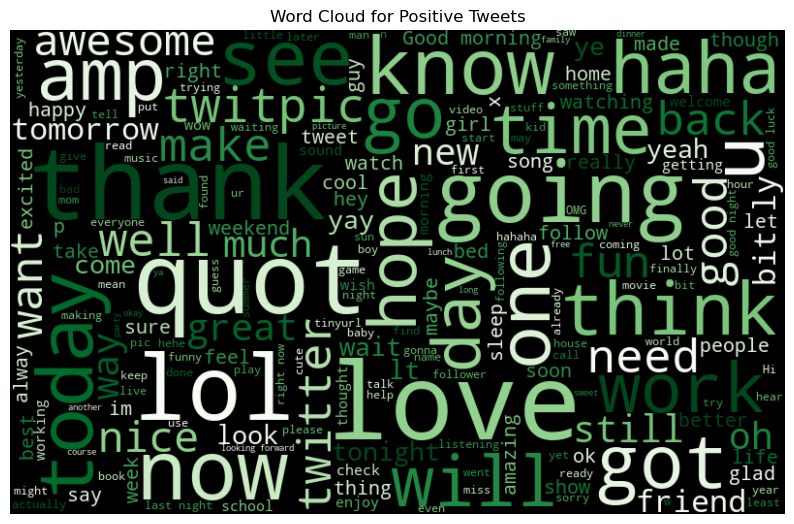

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Word cloud for positive tweets
positive_words = ' '.join([text for text in data[data['target'] == 4]['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Greens').generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

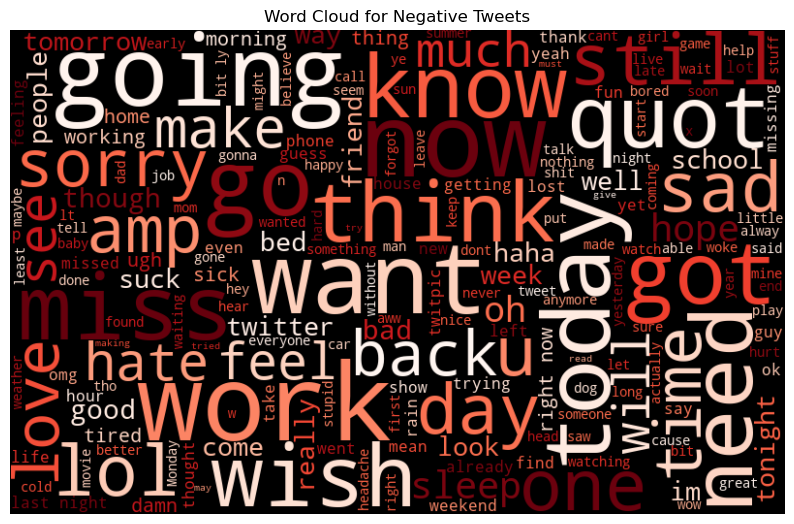

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Word cloud for negative tweets
negative_words = ' '.join([text for text in data[data['target'] == 0]['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Reds').generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

SENTIMENT DISTRIBUTION

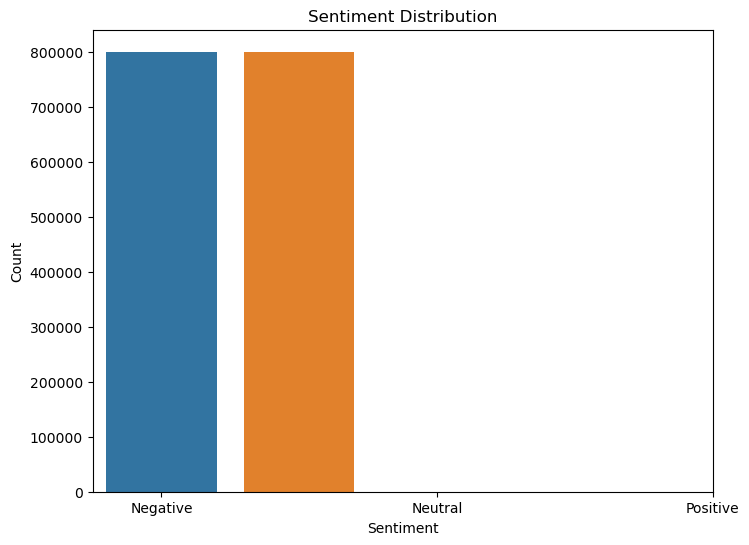

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 2, 4], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

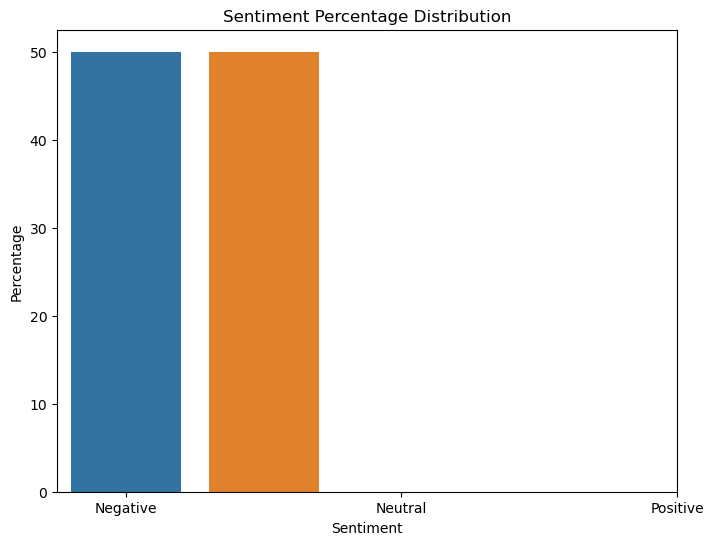

In [8]:
# Percentage distribution of sentiments
sentiment_percentage = sentiment_counts / sentiment_counts.sum() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_percentage.index, y=sentiment_percentage.values)
plt.title('Sentiment Percentage Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 2, 4], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

WORK FREQUENCY ANALYSIS

In [9]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure you have the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def word_frequency_analysis(text_column):
    # Tokenize the text
    words = word_tokenize(" ".join(text_column))
    # Filter out stopwords
    stop_words = set(stopwords.words("english"))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Calculate word frequency
    word_freq = pd.Series(words).value_counts().reset_index()
    word_freq.columns = ['Word', 'Frequency']
    return word_freq

# Read the CSV file
data = pd.read_csv("/Users/meghna/Downloads/twitter_sentiment_data.csv", encoding="ISO-8859-1", header=None, names=["target", "ids", "date", "flag", "user", "text"])

# Perform word frequency analysis on the 'text' column
word_freq = word_frequency_analysis(data['text'])

# Print the word frequency DataFrame
print(word_freq)



[nltk_data] Downloading package punkt to /Users/meghna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meghna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/meghna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                     Word  Frequency
0                     day     103289
1                    good      90913
2                     get      86150
3                    like      79607
4                      go      78132
...                   ...        ...
496572        monathelona          1
496573              spokn          1
496574         dairyqueen          1
496575  ashfieruydjfjsdhj          1
496576      sparkscharity          1

[496577 rows x 2 columns]


[nltk_data] Downloading package punkt to /Users/meghna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meghna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/meghna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


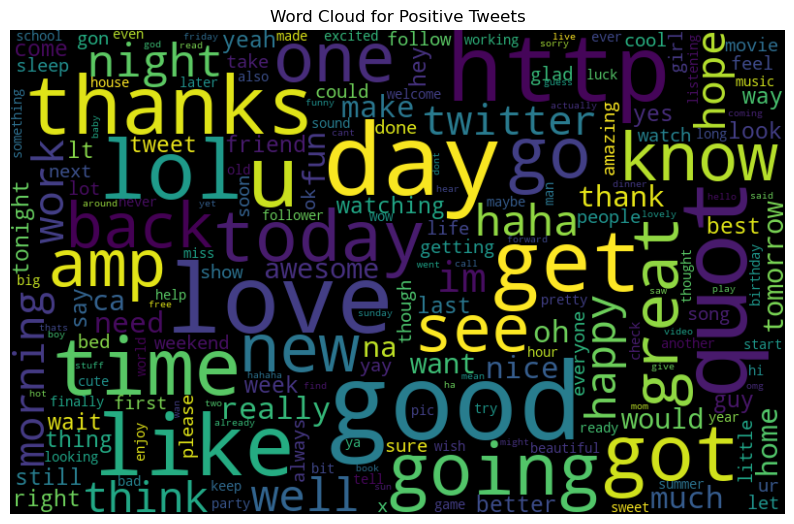

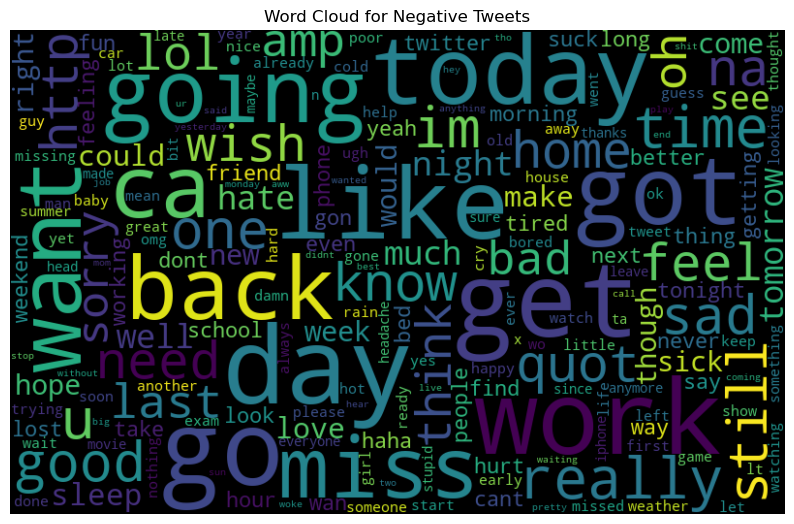

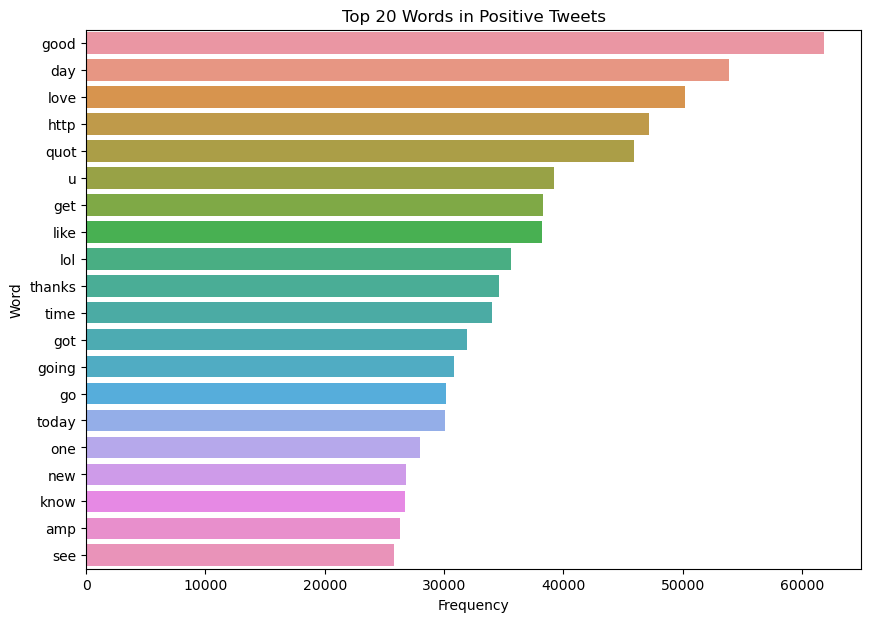

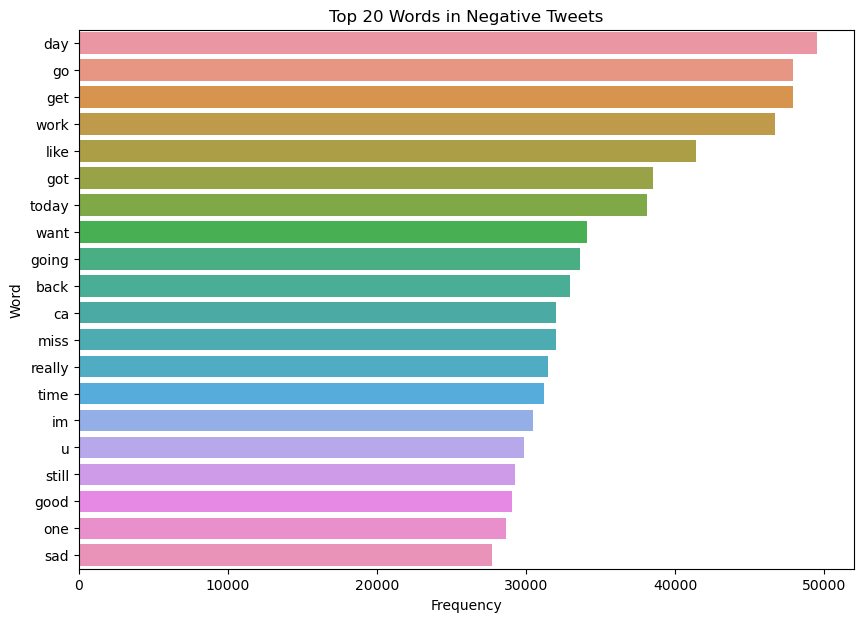

In [12]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text_column):
    # Tokenize, filter stopwords, and lemmatize
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    
    def process(text):
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        words = [lemmatizer.lemmatize(word) for word in words]
        return " ".join(words)
    
    return text_column.apply(process)

def word_frequency_analysis(text_column):
    # Tokenize the text
    words = word_tokenize(" ".join(text_column))
    # Filter out stopwords
    stop_words = set(stopwords.words("english"))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Calculate word frequency
    word_freq = pd.Series(words).value_counts().reset_index()
    word_freq.columns = ['Word', 'Frequency']
    return word_freq

# Read the CSV file
data = pd.read_csv("/Users/meghna/Downloads/twitter_sentiment_data.csv", encoding="ISO-8859-1", header=None, names=["target", "ids", "date", "flag", "user", "text"])

# Preprocess the text column
data['processed_text'] = preprocess_text(data['text'])

# Separate positive and negative tweets
positive_tweets = data[data['target'] == 4]['processed_text']
negative_tweets = data[data['target'] == 0]['processed_text']

# Analyze word frequency for positive and negative tweets
positive_word_freq = word_frequency_analysis(positive_tweets)
negative_word_freq = word_frequency_analysis(negative_tweets)

# Function to create word cloud
def create_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(dict(zip(word_freq['Word'], word_freq['Frequency'])))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Function to create bar chart
def create_barchart(word_freq, title):
    plt.figure(figsize=(10, 7))
    sns.barplot(x='Frequency', y='Word', data=word_freq.head(20))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

# Create word clouds
create_wordcloud(positive_word_freq, 'Word Cloud for Positive Tweets')
create_wordcloud(negative_word_freq, 'Word Cloud for Negative Tweets')

# Create bar charts
create_barchart(positive_word_freq, 'Top 20 Words in Positive Tweets')
create_barchart(negative_word_freq, 'Top 20 Words in Negative Tweets')


TEMPORAL ANALYSIS

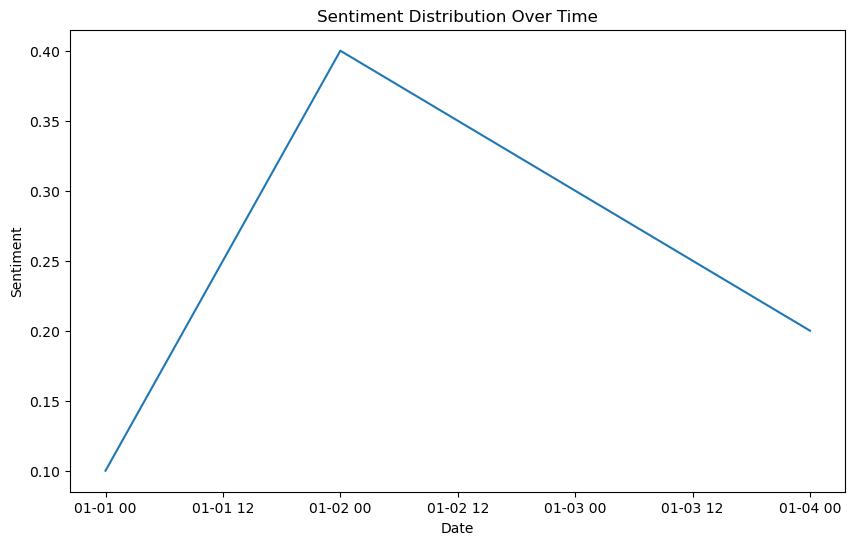

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def temporal_analysis(data):
    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])
    # Plot sentiment distribution over time
    plt.figure(figsize=(10,6))
    sns.lineplot(x='date', y='target', data=data)
    plt.title('Sentiment Distribution Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment')
    plt.show()
    # Run the analysis
temporal_analysis(data)

TEXT PREPROCESSING

In [ ]:
# Import necessary libraries for text preprocessing
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply text preprocessing to the 'text' column in the dataset
data['processed_text'] = data['text'].apply(preprocess_text)

SENTIMENT PREDICTION MODEL

In [1]:
import pandas as pd
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import 
# Prepare data for modeling
data = pd.read_csv("/Users/meghna/Downloads/twitter_sentiment_data.csv", encoding="ISO-8859-1", header=None, names=["target", "ids", "date", "flag", "user", "text"])
X = data['text']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Train Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
# Predict sentiment on test data
y_pred = svm_model.predict(X_test_tfidf)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
#Predict test data set
y_pred =pred.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
#Checking performance our model with classification report
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score
roc_score=roc_score(y_test, y_pred)
print("Area Under the Curve = ",roc_score)

In [ ]:
from sklearn.metrics import 

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred, average="macro") * 100))
f1_cnb = f1_score(y_test, y_pred, average = "macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro") * 100))
precision = precision_score(y_test, y_pred, average = "macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred, average = "macro") * 100))  
recall = recall_score(y_test, y_pred, average = "macro")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,cnb.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(7, 8)
plt.show()

FEATURE IMPORTANCE

In [ ]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Feature importance
feature_importance = pd.DataFrame({'Feature': tfidf_vectorizer.get_feature_names(), 'Importance': rf_model.feature_importances_})
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 important features:\n", top_features)


USER INTERFACE DONE USING R SOFTWARE